# 1. Introduction
The dataset is a record of transactions, perhaps from a supermarket. Each row is a transaction.

We'll refer to the rows as "baskets", since they represent the items bought together in a single transaction.

In [1]:
pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5979 sha256=25fab1ffb92a4251da6723a361f7d9c8774bdb93c806d098f976254d2ffa03b4
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\1b\02\6c\a45230be8603bd95c0a51cd2b289aefdd860c1a100eab73661
Successfully built apyori
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import apyori
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid')

In [3]:
data = pd.read_csv('C:/Users/Dell/Desktop/DATA MINING/Market_Basket_Optimisation.csv',
                   header=None, names=['item_'+str(i) for i in range(1,21)])
data.head()

,item_1,item_2,item_3,item_4,item_5,item_6,item_7,item_8,item_9,item_10,item_11,item_12,item_13,item_14,item_15,item_16,item_17,item_18,item_19,item_20
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Some items e.g asparagus appear in multiple forms due to leading/trailing whitespace.

In [4]:
sorted(data.melt()["value"].dropna().unique())[:5]

[' asparagus', 'almonds', 'antioxydant juice', 'asparagus', 'avocado']

In [7]:
# remove trailing and leading whitespace e.g. ' asparagus' to 'asparagus'
for col in data.columns:
    data[col] = data[col].str.strip()

sorted(data.melt()["value"].dropna().unique())[:5]

['almonds', 'antioxydant juice', 'asparagus', 'avocado', 'babies food']

In [8]:
all_items = data.melt()["value"].dropna().sort_values()
print(f"There were {all_items.nunique()} different products:\n", all_items.unique())

There were 119 different products:
 ['almonds' 'antioxydant juice' 'asparagus' 'avocado' 'babies food' 'bacon'
 'barbecue sauce' 'black tea' 'blueberries' 'body spray' 'bramble'
 'brownies' 'bug spray' 'burger sauce' 'burgers' 'butter' 'cake'
 'candy bars' 'carrots' 'cauliflower' 'cereals' 'champagne' 'chicken'
 'chili' 'chocolate' 'chocolate bread' 'chutney' 'cider'
 'clothes accessories' 'cookies' 'cooking oil' 'corn' 'cottage cheese'
 'cream' 'dessert wine' 'eggplant' 'eggs' 'energy bar' 'energy drink'
 'escalope' 'extra dark chocolate' 'flax seed' 'french fries'
 'french wine' 'fresh bread' 'fresh tuna' 'fromage blanc'
 'frozen smoothie' 'frozen vegetables' 'gluten free bar' 'grated cheese'
 'green beans' 'green grapes' 'green tea' 'ground beef' 'gums' 'ham'
 'hand protein bar' 'herb & pepper' 'honey' 'hot dogs' 'ketchup'
 'light cream' 'light mayo' 'low fat yogurt' 'magazines' 'mashed potato'
 'mayonnaise' 'meatballs' 'melons' 'milk' 'mineral water' 'mint'
 'mint green tea' 'muffi

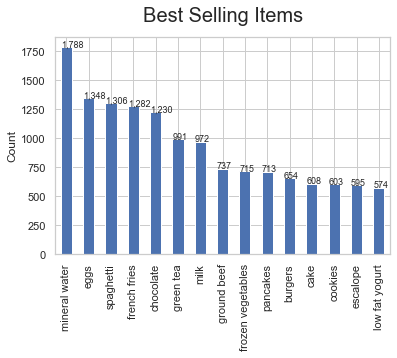

In [9]:
item_counts = all_items.value_counts()

ax = item_counts.nlargest(15).plot(kind="bar")
ax.set_title("Best Selling Items", size=20, weight=500, pad=15)
ax.set_ylabel("Count")

for p in ax.patches:
    ax.annotate(f"{p.get_height():,}", xy=(p.get_x(), p.get_height()), size=9)

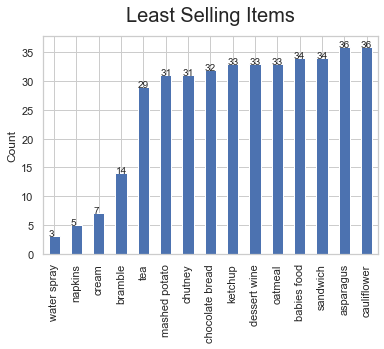

In [10]:
ax = item_counts.nsmallest(15).plot(kind="bar")
ax.set_title("Least Selling Items", size=20, weight=500, pad=15)
ax.set_ylabel("Count")

for p in ax.patches:
    ax.annotate(f"{p.get_height():,}", xy=(p.get_x(), p.get_height()), size=10)

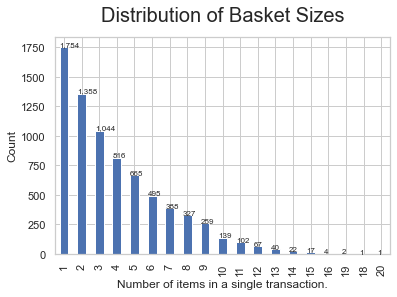

In [11]:
basket_sizes = data.notna().apply(sum, axis=1)

ax = basket_sizes.value_counts().plot.bar()
ax.set_title("Distribution of Basket Sizes", size=20, weight=500, pad=15)
ax.set_ylabel("Count")
ax.set_xlabel("Number of items in a single transaction.")

for p in ax.patches:
    ax.annotate(f"{p.get_height():,}", xy=(p.get_x(), p.get_height()), size=8)

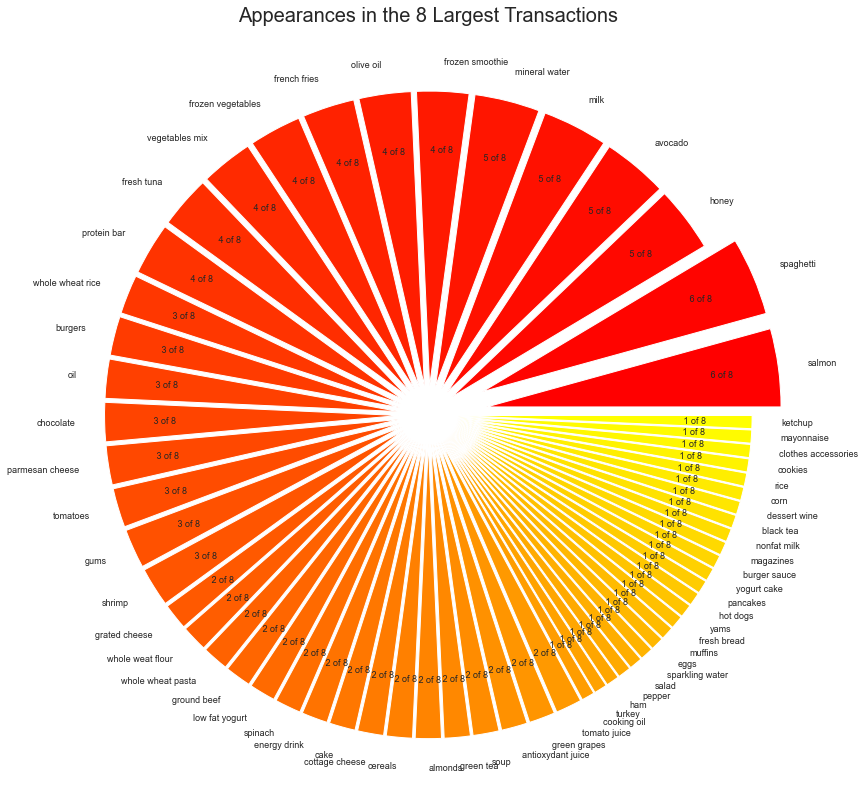

In [12]:
items_in_largest_transactions = data[basket_sizes > 15].melt()['value'].dropna()

pie_data = items_in_largest_transactions.value_counts()
ax = pie_data.plot.pie(
    cmap="autumn",
    explode=[0.2] * 2 + [0.1] * 59,
    figsize=(12, 12),
    autopct=lambda pct: f" {pct * 0.01 * pie_data.sum():.0f} of 8",
    pctdistance=0.8,
    textprops={"size": 9},
)
ax.set_title("Appearances in the 8 Largest Transactions", size=20, pad=25)
ax.set_ylabel("")
ax.figure.tight_layout()

In [21]:
# Converting the transaction data rows to sets, with NaN values as empty strings.
transactions = data.fillna('').apply(set, axis=1)
transactions

0       {green tea, shrimp, salad, olive oil, green gr...
1                            {, meatballs, eggs, burgers}
2                                             {, chutney}
3                                     {turkey, , avocado}
4       {, energy bar, mineral water, green tea, whole...
                              ...                        
7496                  {, butter, fresh bread, light mayo}
7497    {, magazines, green tea, french fries, eggs, f...
7498                                          {, chicken}
7499                              {green tea, , escalope}
7500    {yogurt cake, , low fat yogurt, eggs, frozen s...
Length: 7501, dtype: object

In [22]:
# Getting rid of the empty strings
for basket in transactions:
    try:
        basket.remove('')
    except KeyError:  # raised where '' is absent (transaction had max items)
        pass
    
# Removing 'un-interesting' transactions involving only 1 item
def remove_one_item_purchases(iterable):
    """
    Helps get rid of transactions with a sole item, lacking 'association'
    """
    return [items for items in iterable if len (items) > 1 ] 

baskets = remove_one_item_purchases(transactions)
baskets

[{'almonds',
  'antioxydant juice',
  'avocado',
  'cottage cheese',
  'energy drink',
  'frozen smoothie',
  'green grapes',
  'green tea',
  'honey',
  'low fat yogurt',
  'mineral water',
  'olive oil',
  'salad',
  'salmon',
  'shrimp',
  'spinach',
  'tomato juice',
  'vegetables mix',
  'whole weat flour',
  'yams'},
 {'burgers', 'eggs', 'meatballs'},
 {'avocado', 'turkey'},
 {'energy bar', 'green tea', 'milk', 'mineral water', 'whole wheat rice'},
 {'french fries', 'whole wheat pasta'},
 {'light cream', 'shallot', 'soup'},
 {'frozen vegetables', 'green tea', 'spaghetti'},
 {'eggs', 'pet food'},
 {'burgers', 'cooking oil', 'eggs', 'mineral water', 'turkey'},
 {'champagne', 'cookies', 'spaghetti'},
 {'mineral water', 'salmon'},
 {'chicken',
  'chocolate',
  'cooking oil',
  'honey',
  'low fat yogurt',
  'oil',
  'shrimp'},
 {'eggs', 'turkey'},
 {'black tea',
  'chicken',
  'eggs',
  'extra dark chocolate',
  'fresh tuna',
  'mineral water',
  'salmon',
  'spaghetti',
  'tomatoes'

In [15]:
baskets = [set(row.dropna()) for _, row in data[basket_sizes > 1].iterrows()]
baskets[-5:]

[{'light mayo', 'pancakes'},
 {'butter', 'fresh bread', 'light mayo'},
 {'burgers',
  'eggs',
  'french fries',
  'frozen vegetables',
  'green tea',
  'magazines'},
 {'escalope', 'green tea'},
 {'eggs', 'frozen smoothie', 'low fat yogurt', 'yogurt cake'}]

In [16]:
import apyori

# The apyori.apriori method returns a generator object
association_rules = apyori.apriori(baskets, min_support=0.03, min_confidence=0.3)


for rule in association_rules:
    items = list(rule.items)
    print(
        f"{items[:-1]}  --> [{items[-1]}]     Support: {rule.support:.3f}"
        f"  Confidence: {rule.ordered_statistics[0].confidence:.3f}"
    )

['eggs']  --> [burgers]     Support: 0.038  Confidence: 0.341
['mineral water']  --> [cake]     Support: 0.036  Confidence: 0.356
['mineral water']  --> [chocolate]     Support: 0.069  Confidence: 0.342
['mineral water']  --> [eggs]     Support: 0.066  Confidence: 0.304
['mineral water']  --> [frozen vegetables]     Support: 0.047  Confidence: 0.385
['spaghetti']  --> [frozen vegetables]     Support: 0.036  Confidence: 0.300
['ground beef']  --> [mineral water]     Support: 0.053  Confidence: 0.429
['ground beef']  --> [spaghetti]     Support: 0.051  Confidence: 0.411
['low fat yogurt']  --> [mineral water]     Support: 0.031  Confidence: 0.340
['mineral water']  --> [milk]     Support: 0.063  Confidence: 0.383
['mineral water']  --> [olive oil]     Support: 0.036  Confidence: 0.439
['mineral water']  --> [pancakes]     Support: 0.044  Confidence: 0.375
['mineral water']  --> [shrimp]     Support: 0.031  Confidence: 0.339
['mineral water']  --> [soup]     Support: 0.030  Confidence: 0.